# Проект: Принятие решений в бизнесе

# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Описание данных

### Данные для первой части

**Файл: /datasets/hypothesis.csv**

• Hypothesis — краткое описание гипотезы;

• Reach — охват пользователей по 10-балльной шкале;

• Impact — влияние на пользователей по 10-балльной шкале;

• Confidence — уверенность в гипотезе по 10-балльной шкале;

• Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


### Данные для второй части

**Файл: /datasets/orders.csv**

• transactionId — идентификатор заказа;

• visitorId — идентификатор пользователя, совершившего заказ;

• date — дата, когда был совершён заказ;

• revenue — выручка заказа;

• group — группа A/B-теста, в которую попал заказ.

**Файл: /datasets/visitors.csv**

• date — дата;

• group — группа A/B-теста;

• visitors — количество пользователей в указанную дату в указанной группе A/B-теста


# Оглавление

- [Описание проекта](#Описание-проекта)
- [Описание данных](#Описание-данных)
- [Оглавление](#Оглавление)
- [Выполнению проекта](#Выполнению-проекта)
    - [Загрузим данные и подготовим их к анализу](#Загрузим-данные-и-подготовим-их-к-анализу)
        - [Подключим библиотеки.](#Подключим-библиотеки.)
        - [Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.](#Загрузим-данные-из-csv-файла-в-датафрейм-c-помощью-библиотеки-pandas.)
        - [Изучим общую информацию о полученном датафрейме.](#Изучим-общую-информацию-о-полученном-датафрейме.)
        - [Предобработка данных.](#Предобработка-данных.)
    - [Часть 1. Приоритизация гипотез.](#Часть-1.-Приоритизация-гипотез.)
        - [Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.](#Применим-фреймворк-ICE-для-приоритизации-гипотез.-Отсортируем-их-по-убыванию-приоритета.)
        - [Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.](#Применим-фреймворк-RICE-для-приоритизации-гипотез.-Отсортируем-их-по-убыванию-приоритета.)
        - [Вывод: Приоритизация гипотез.](#Вывод:-Приоритизация-гипотез.)
    - [Часть 2. Анализ A/B-теста](#Часть-2.-Анализ-A/B-теста)
        - [1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.](#1.-Построим-график-кумулятивной-выручки-по-группам.-Сделаем-выводы-и-предположения.)
        - [2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.](#2.-Построим-график-кумулятивного-среднего-чека-по-группам.-Сделаем-выводы-и-предположения.)
        - [3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.](#3.-Построим-график-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A.-Сделаем-выводы-и-предположения.)
        - [4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.](#4.-Построим-график-кумулятивного-среднего-количества-заказов-на-посетителя-по-группам.-Сделаем-выводы-и-предположения.)
        - [5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.](#5.-Построим-график-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A.-Сделаем-выводы-и-предположения.)
        - [6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.](#6.-Построим-точечный-график-количества-заказов-по-пользователям.-Сделаем-выводы-и-предположения.)
        - [7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.](#7.-Посчитаем-95-й-и-99-й-перцентили-количества-заказов-на-пользователя.-Выберем-границу-для-определения-аномальных-пользователей.)
        - [8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#8.-Постройте-точечный-график-стоимостей-заказов.-Сделайте-выводы-и-предположения.)
        - [9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.](#9.-Посчитаем-95-й-и-99-й-перцентили-стоимости-заказов.-Выберем-границу-для-определения-аномальных-заказов.)
        - [10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.](#10.-Посчитайте-статистическую-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным.-Сделайте-выводы-и-предположения.)
        - [11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.](#11.-Посчитаем-статистическую-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным.-Сделаем-выводы-и-предположения.)
        - [12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.](#12.-Посчитаем-статистическую-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным.-Сделаем-выводы-и-предположения.)
        - [13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#13.-Посчитайте-статистическую-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным.-Сделайте-выводы-и-предположения.)
        - [14. Принятие решения по результатам теста.](#14.-Принятие-решения-по-результатам-теста.)

# Выполнению проекта

## Загрузим данные и подготовим их к анализу

### Подключим библиотеки.

In [1]:
# Библиотека для работы с данными
import pandas as pd

# Библиотека для создания графиков
import matplotlib.pyplot as plt

# Библиотека для создания статистических графиков
import seaborn as sns

# Библиотека для научных вычислений
import numpy as np

# Модуль stats из библиотеки scipy для работы со статистическими методами
from scipy import stats

# Модули для работы с временем
import datetime as dt

from pandas.plotting import register_matplotlib_converters 

import warnings



### Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep = ',')
    orders = pd.read_csv('/datasets/orders.csv', sep = ',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep = ',')
except:
    hypothesis = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/datasets/hypothesis.csv', sep = ',')
    orders = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/datasets/orders.csv', sep = ',')
    visitors = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/datasets/visitors.csv', sep = ',')

# Установка опции для отображения всех столбцов
pd.options.display.max_columns = None

Для последующей проверки процента очищенных данных посчитаем количество строк в DataFrame

In [3]:
#  Количество строк до обработки
initial_row_count_hypothesis = hypothesis.shape[0]
print(f'Количество строк до обработки таблицы visits_info_short: {initial_row_count_hypothesis}')

initial_row_count_orders = orders.shape[0]
print(f'Количество строк до обработки таблицы orders_info_short: {initial_row_count_orders}')

initial_row_count_visitors = visitors.shape[0]
print(f'Количество строк до обработки таблицы costs_info_short: {initial_row_count_visitors}')

Количество строк до обработки таблицы visits_info_short: 9
Количество строк до обработки таблицы orders_info_short: 1197
Количество строк до обработки таблицы costs_info_short: 62


### Изучим общую информацию о полученном датафрейме.


#### Датафрейм — hypothesis

In [4]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


#### Датафрейм — orders

In [6]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


#### Датафрейм — visitors

In [8]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Вывод:

**Пропущенные значения:**

Пропущенные значения в колонках отсутствуют.

**Типы данных:**

В Датафрейме — orders.Имеет смысл заменить тип данных колонки date, с object на date.

Во  датафрейме hypothesis заменим названия столбцов (приведем к нижнему регистру).


**Данные готовы к проведению этапа предобработки.**

### Предобработка данных.

#### Заменим названия столбцов (приведем к нижнему регистру).

In [10]:
hypothesis = hypothesis.rename(columns={
    'Hypothesis':'hypothesis',
    'Reach':'reach',
    'Impact':'impact',
    'Confidence':'confidence',
    'Efforts':'efforts'
})

In [11]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


#### Обработка дубликатов.

Проверим наличие явных дубликатов

In [12]:
def dubl_sum(x):
    return x.duplicated().sum()


print(f'Количество явных дубликатов в hypothesis: {dubl_sum(hypothesis)}')
print(f'Количество явных дубликатов в orders: {dubl_sum(orders)}')
print(f'Количество явных дубликатов в visitors: {dubl_sum(visitors)}')

Количество явных дубликатов в hypothesis: 0
Количество явных дубликатов в orders: 0
Количество явных дубликатов в visitors: 0


**Вывод:** Дубликатов нет. Пропущенных значений нет. Можно приступать к приоритезации гипотез.

## Часть 1. Приоритизация гипотез.

In [13]:
hypothesis.head()



,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


В датафрейме hypothesis, рассмотрим гипотезы по увеличению выручки интернет-магазина.

In [14]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

In [15]:

# расчтаем по формуле (impact * confidense)/efforts 
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
# выведем название гипотезы, остортиорованные по убываню ICE
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))

                                          hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


8 гипотеза набрала больше всего очков - "Запустить акцию, дающую скидку на товар в день рождения

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

RICE (R от англ. reach, «охват»)

In [16]:
# расчтаем по формуле RICE = (Reach x Impact x Confidence)/Efforts
hypothesis['RICE']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
# выведем название гипотезы, остортиорованные по убываню RICE
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Значительный отрыв по очкам имеет 7-я гипотеза - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


### Вывод: Приоритизация гипотез.

На примерах, убедились в том, как работает приоритезация гипотез во фрейморках ICE и RICE, есть 1 компонент, который влияет на итоговый показатель обратно попропорционально - это efforts - чем он меньше, тем лучше, все остальные влияеют прямопропционально - это impact, сonfidence, efforts и reach(для RICE)

Несмотря на то, что данные методы очень похожи приоритезация гипотезы в зависимости от выбора того или иного, может существенно различаться, если мы ищем гипотезу, которая охватит больший круг пользователей, то выбираем RICE, если этот компонент не так важен или не для каждой гипотезы его можно объективно оценть, то ICE.

В данном случае, для проведения A/B теста возьмём гипотезу №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", т.к. у нас есть необходимая оценка и ресурсы для проведения

## Часть 2. Анализ A/B-теста

### 1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Для начала создадим датафреймы с уникальными агрегироваными кумулятивными данными по каждый таблице:

In [17]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


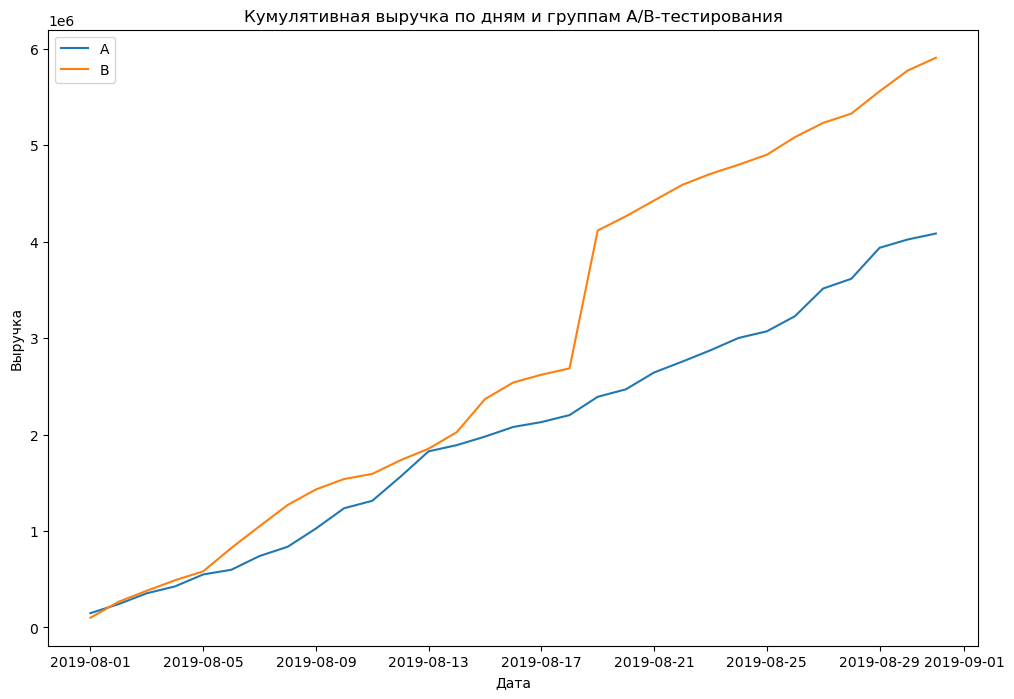

In [19]:
# Убедимся, что столбец 'date' имеет тип datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# Дальнейший код остается без изменений
datesGroups = orders[['date', 'group']].drop_duplicates()

# Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Выведем полученные таблицы на экран
display(ordersAggregated.head()) 
print('')
display(visitorsAggregated.head())  

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.show()

По графику видим следующее:

группа B лидирирует на всём периоде
у группы B произошёл резкий рост в период с 18 на 19 августа, на это могут быть 2 причины:
в группу попал анамально дорогой заказ
в этот день было много заказов

Выведем графики для группы B с изменение кол-ва заказов и выручки:

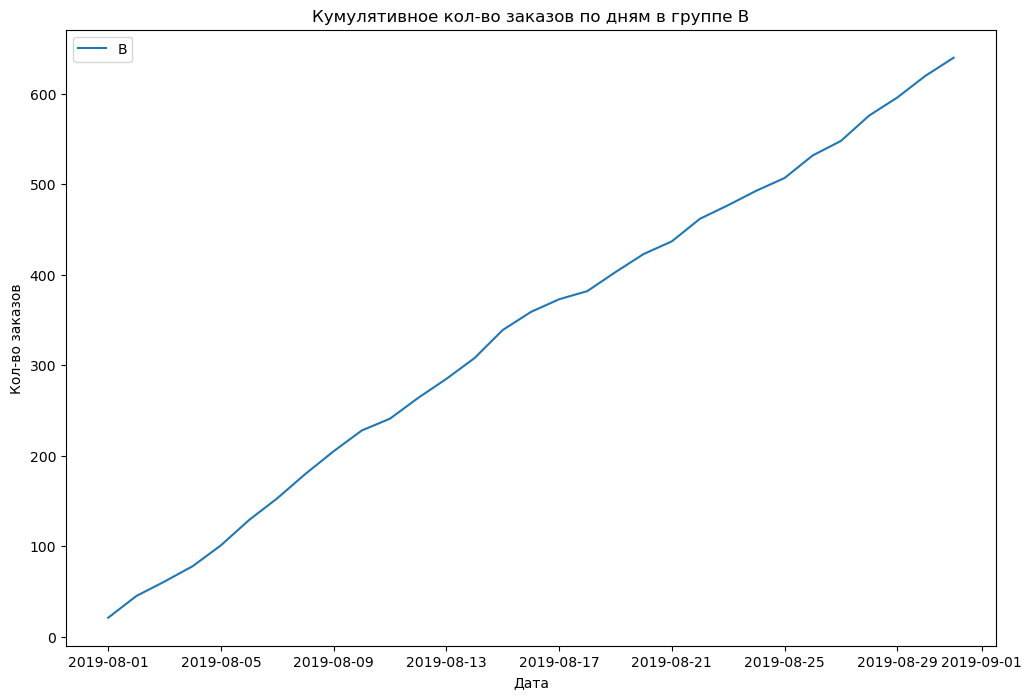

In [20]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов') 
plt.title('Кумулятивное кол-во заказов по дням в группе B')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

График с кол-вом заказов, растет стабильно, без скачков.

Сейчас, изучим график с выручкой:

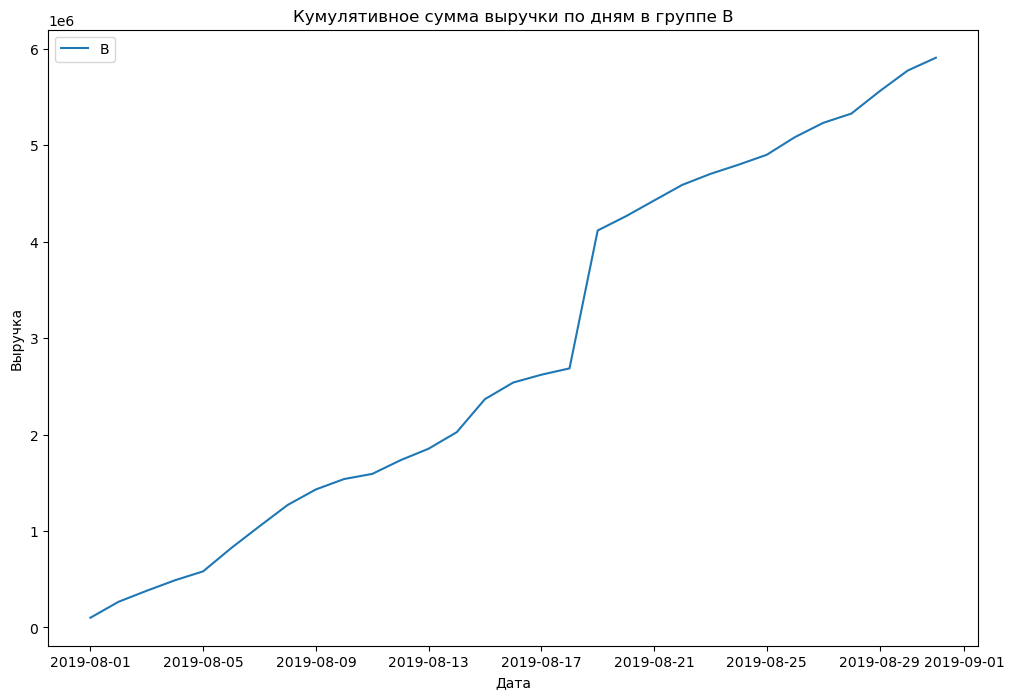

In [21]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивное сумма выручки по дням в группе B')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.show()

Видим, что на графике с выручкой, есть скачок. Вероятно, в один из дней заказа попал анамально большой заказ.

### 2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

Для этого разделим кумулятивную выручку на кумулятивное число заказов:

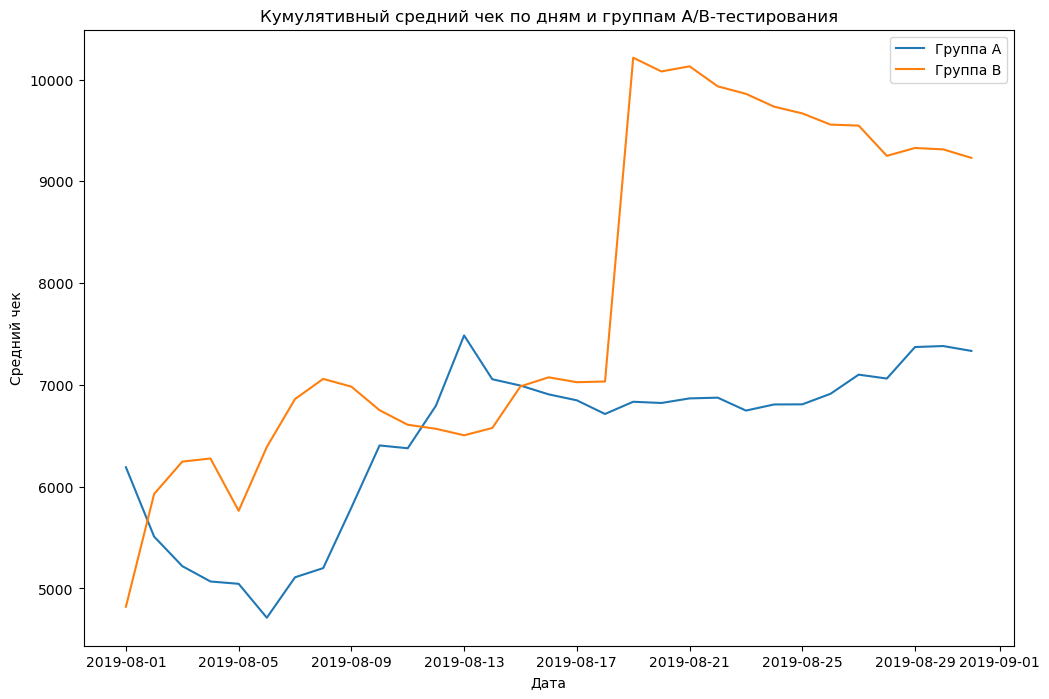

In [22]:
plt.figure(figsize=(12,8)) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(['Группа А', 'Группа B']) 
plt.show()

На графиках видим:

- в первой половине теста графики ведут себя не стабильно, есть как сильные росты, так и падения

- к коцу периода коммулятивный средний чек группы B, выше, чем у А, но стоит учесть, что были анамальные значения

- к концу периода у группы А есть тенденция к росту, а у B к снижению

### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

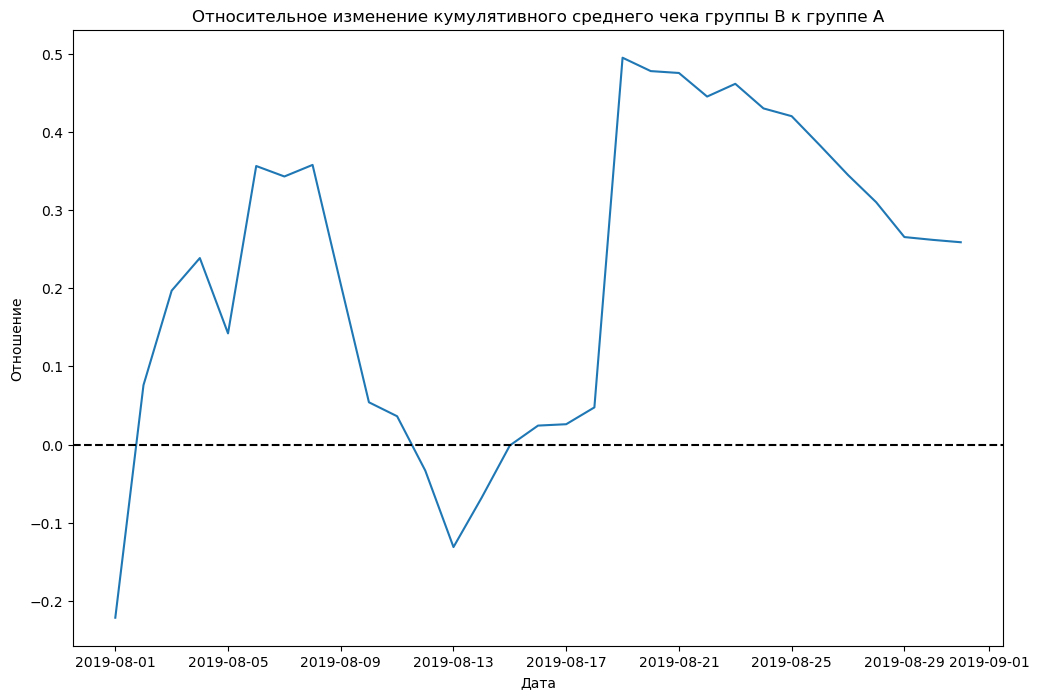

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,8)) 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Мы построили график относительного различия в среднем чеке между группами.

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

### 4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

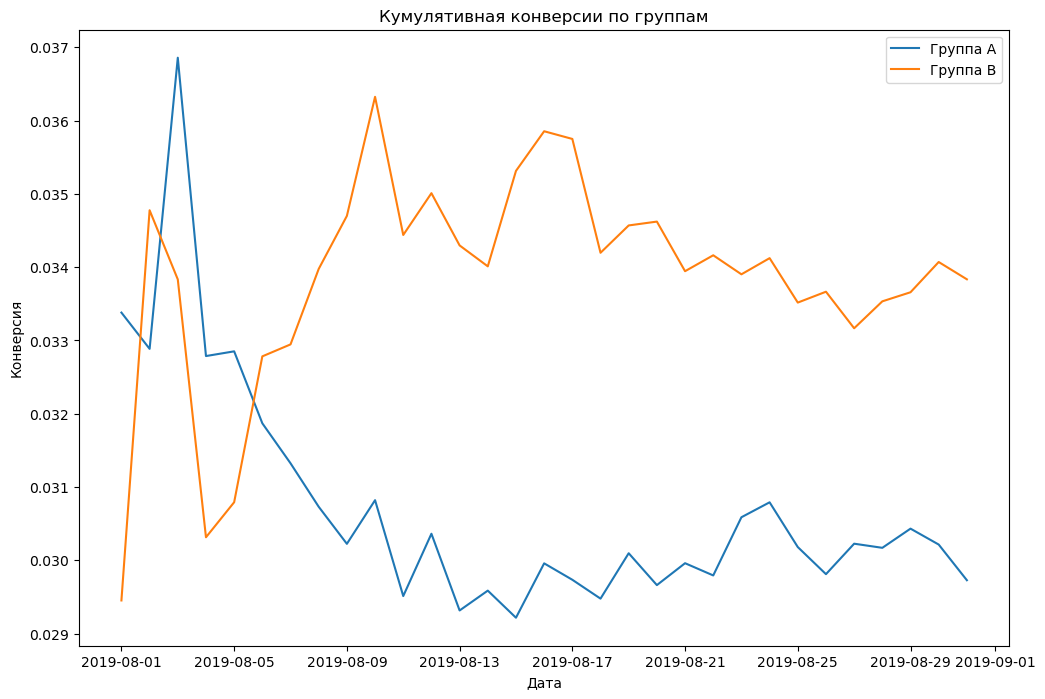

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# зададим размеры графика  
plt.figure(figsize=(12,8))   

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
# задаем масштаб осей
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсии по группам')
plt.show()  


В начале теста сегмент A имел большее кумулятивное среднее количество заказов из-за скачка, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, значительно больше значения сегмента A.

- для А конверсия держалась на уровне от 0.029 до 0.031,

- для B от 0.034 до 0.036

Предварительно гипотеза подтверждается, с новововведениями на сайте - конверсия растёт

### 5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

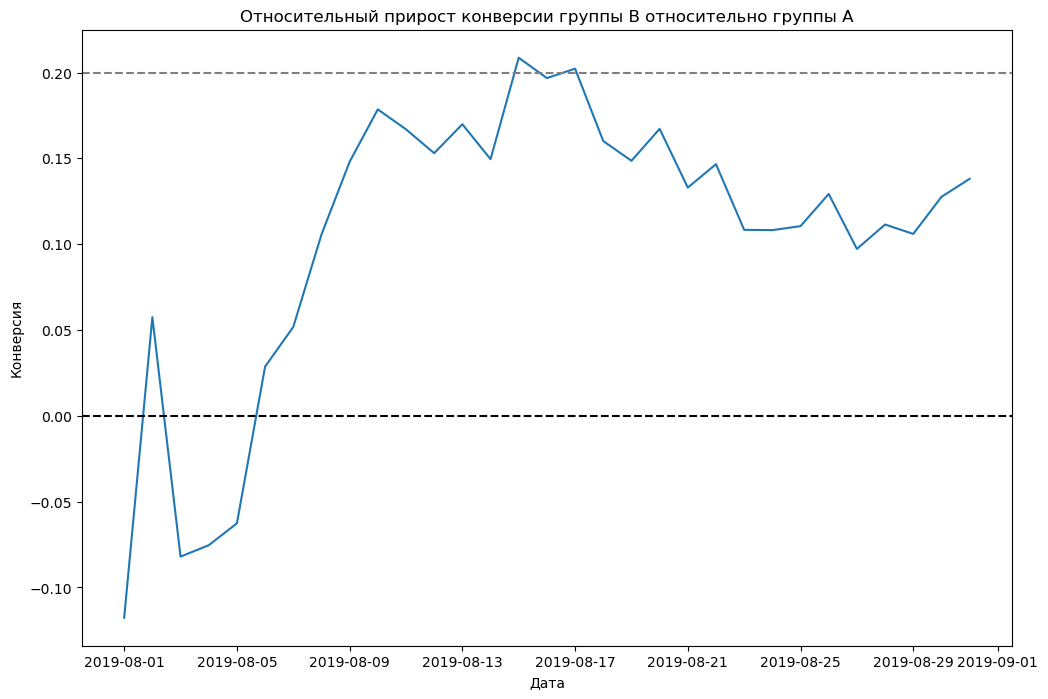

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# зададим размеры графика  
plt.figure(figsize=(12,8))   

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

# добавляем ось X c нулевым приростом и отметку в 20% 
plt.axhline(y=0, color='black', linestyle='--')  
plt.axhline(y=0.2, color='grey', linestyle='--') 

# зададим описание графика 
plt.ylabel('Конверсия') 
plt.xlabel('Дата') 
plt.title('Относительный прирост конверсии группы B относительно группы A') 
plt.show()

Мы построили график относительного различия метрики между группами.

Почти с самого начала теста группа B лидирует по метрике: становится лучше и лучше, на 6й день теста, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода

### 6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

Для начала, найдем число заказов по пользователям — создайте датафрейм c двумя столбцами: 'userId' и 'orders'. Назовите его ordersByUsers. 

In [26]:

# Метод .groupby('...', as_index=False) сгруппирует заказы по пользователям
# Метод .agg({'...' : 'nunique',}) подсчитает число уникальных заказов по сгруппированным данным
ordersByUsers = (
    orders.groupby('visitorId', as_index = False)
    .agg({'transactionId':'nunique'}))
    
#переименуем столбуы     
ordersByUsers.columns = ['user_id', 'orders']

# Метод .sort_values(by='...',ascending=False) отсортирует датафрейм по значению в столбце
ordersByUsers.sort_values(by = 'orders', ascending = False).head(10)




,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Получили число заказов по пользователям.

На основе полученной таблицы построим точечную диаграмму:

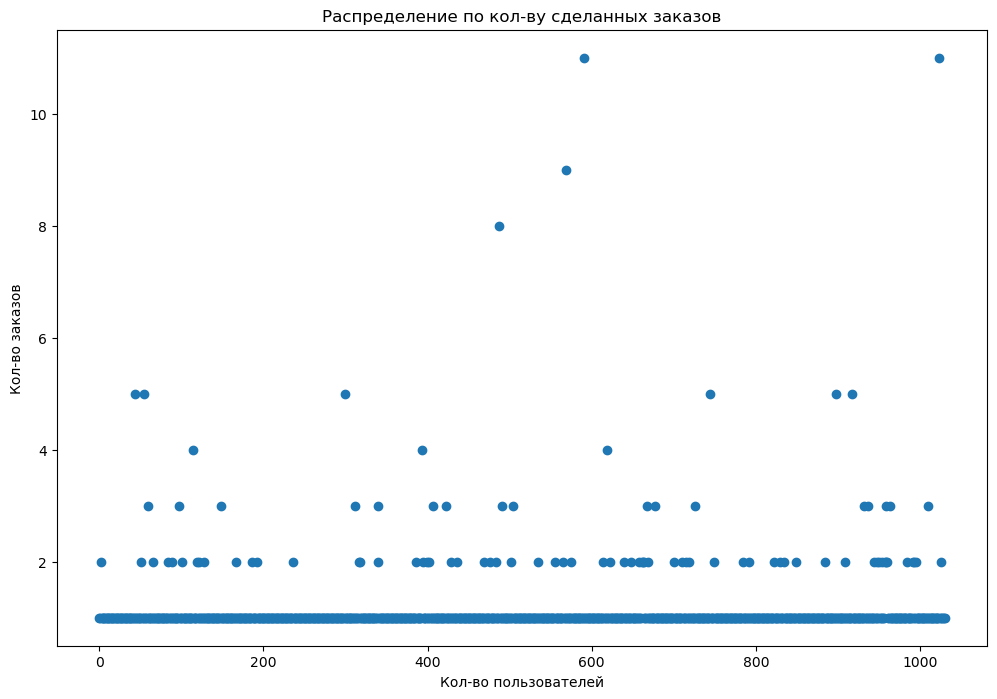

In [27]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
plt.scatter(x_values,ordersByUsers['orders'])
# зададим описание графика 
plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по кол-ву сделанных заказов') 
plt.show() 

Пользователей, заказавших более трех раз, совсем мало. Они вполне могут быть аномальными.

### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [28]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырех заказов.

Устанавливаем границу по колличеству заказов на пользователя в 3 шт., заключим её в переменную:

In [29]:
to_much_orders = 3 

### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Взгялнем на табличные значения:

In [30]:
orders[['visitorId', 'revenue']].sort_values(by='revenue', ascending=False).head(10) 

,visitorId,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
682,4266935830,78990
662,4266935830,78990
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710


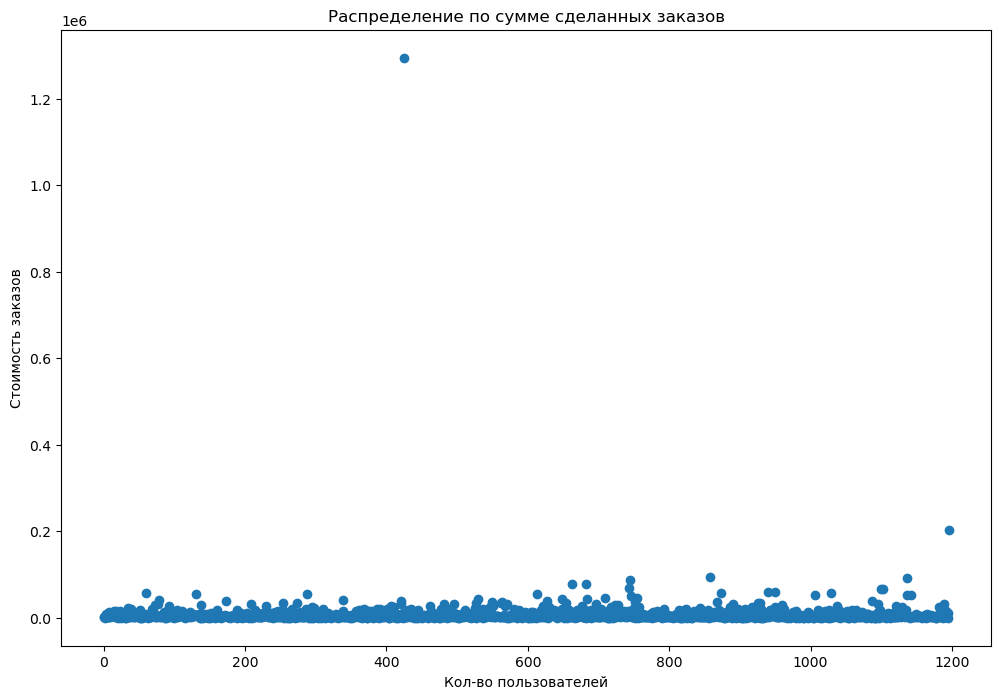

In [31]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))

# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
plt.scatter(x_values, orders['revenue'])

# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show() 

Видим на графике 2 аномально дорогих заказа на 200_000 руб. и на 1.5 млн. руб. Для более точного понимания границы определения аномальных пользователей. 

### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [32]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Получаем следующий результат:

- не более 5 % заказов стомостью более 28000 рублей
- не более 1 % заказов стомостью более 58000 рублей

Устанавливаем границу по сумме заказа, добавив её в переменную:

In [33]:
to_much_revenues = 29000

### 10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 

Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни:

**H0:** Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет;

**H1:** Среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть.

**Коэффициент альфа:** 0.05

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [35]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)

result_1 = stats.mannwhitneyu(sampleA, sampleB)[1]
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1:.3f}')

# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

print('Относительные различия В к А:',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

Значение p-value : 0.017
Отвергаем нулевую гипотезу
Относительные различия В к А: 0.138


P-value значительно меньше 0.05, значит стоит отвергнуть нулевую гипотезу. 

"Сырые данные" говорят о том, что в среднем количестве заказов между группами есть статистически значимые различия. 

Относительный прирост среднего группы В к конверсии группы А равен 13.8%

### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

**H0:** Средние чеки групп A и B равны, статистически значимых отличий нет;

**H1:** Средние чеки групп A и B различны, статистически значимые отличия есть.

**Коэффициент альфа:** 0.05

In [37]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  
#введем значение p-value
print(f'Значение p-value : {result_2:.3f}')
# условный оператор с выводом строки с ответом
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем основные показатели

print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()))

Значение p-value : 0.729
Не получилось отвергнуть нулевую гипотезу
Средний чек группы B: 1.26


P-value значительно больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами около 26%.

### 12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Ранее мы 

устанавливили границу по сумме заказа: **to_much_revenues = 29000**

устанавливили границу по колличеству заказов на пользователя **to_much_orders = 3**

**Выдвигаем гипотезы:**

**Н0** - различия в конверсии между группами по «очищенным» данным статистически не значимы

**Н1** - различия в конверсии между группами по «очищенным» данным статистически значимы

Удалять будем именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных.

In [41]:
# Определяем аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > to_much_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > to_much_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > to_much_revenues]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Фильтруем данные, исключая аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 



# Проверяем статистическую значимость различий с помощью U-критерия Манна-Уитни
result_3 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-значение: {0:.3f}'.format(result_3))

# условный оператор с выводом строки с ответом
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

# Сравниваем среднее количество заказов на посетителя
mean_ratio = sampleBFiltered.mean() / sampleAFiltered.mean() - 1
print('Относительная разница в среднем количестве заказов: {0:.3f}'.format(mean_ratio))

p-значение: 0.018
Отвергаем нулевую гипотезу
Относительная разница в среднем количестве заказов: 0.148


**Вывод:** p-value меньше 0.05, соответственно отвергаем нулевую гипотезу. Относительный прирост по очищенным данным группы B к группе А ненамного увеличился и равен 13%

### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Н0:** различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы

**Н1:** различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы

Значение alpha примем 0.05

In [43]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.964
Относительные различия: -0.019


**Вывод:** p-value снова больше 0.05, поэтому нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между группами практически нулевое

### 14. Принятие решения по результатам теста.

**По результатам исследований, примем решение:**

- Относительный прирост среднего группы В к конверсии группы А равен 13.8%

- Средние чеки групп A и B равны, статистически значимых отличий нет. Относительное различие среднего чека между сегментами около 26%.

- Относительный прирост по очищенным данным группы B к группе А ненамного увеличился и равен 13%

- Различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы.


Остановим тест, зафиксируем победу группы В.